In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time


API_KEY = '14ef59ca78c8f835ed483826002c7fc0'
BASE_URL = "https://api.openweathermap.org/data/2.5/weather?"

kota = {
    "Semarang": {"lat": -6.9667, "lon": 110.4167},
    "Surakarta": {"lat": -7.5666, "lon": 110.8167},
    "Pekalongan": {"lat": -6.8883, "lon": 109.6753},
    "Tegal": {"lat": -6.8670, "lon": 109.1333},
    "Salatiga": {"lat": -7.3305, "lon": 110.5084},
    "Magelang": {"lat": -7.4700, "lon": 110.2170},
    "Sukoharjo": {"lat": -7.6841, "lon": 110.8317},
    "Sragen": {"lat": -7.4264, "lon": 111.0213},
    "Karanganyar": {"lat": -7.6305, "lon": 110.9519},
    "Wonogiri": {"lat": -7.8833, "lon": 111.0333},
    "Boyolali": {"lat": -7.5333, "lon": 110.5833},
    "Klaten": {"lat": -7.7056, "lon": 110.6064},
    "Purworejo": {"lat": -7.7164, "lon": 110.0031},
    "Wonosobo": {"lat": -7.3580, "lon": 109.9012},
    "Kebumen": {"lat": -7.6796, "lon": 109.6516},
    "Purwokerto": {"lat": -7.4214, "lon": 109.2345},
    "Cilacap": {"lat": -7.7325, "lon": 109.0103},
    "Purbalingga": {"lat": -7.3892, "lon": 109.3633},
    "Pemalang": {"lat": -6.9000, "lon": 109.3667},
    "Brebes": {"lat": -6.8667, "lon": 109.0333},
    "Pati": {"lat": -6.7542, "lon": 111.0383},
    "Kudus": {"lat": -6.8048, "lon": 110.8384},
    "Jepara": {"lat": -6.5833, "lon": 110.6667},
    "Demak": {"lat": -6.8922, "lon": 110.6394},
    "Ungaran": {"lat": -7.1397, "lon": 110.4057},
    "Kendal": {"lat": -6.9240, "lon": 110.2056},
    "Purwodadi": {"lat": -7.0867, "lon": 110.9053},
    "Blora": {"lat": -6.9695, "lon": 111.4181},
    "Rembang": {"lat": -6.7094, "lon": 111.3478},
    "Cepu": {"lat": -7.1500, "lon": 111.5917}
}

def get_weather_data(lat, lon):
    params = {
        "lat": lat,
        "lon": lon,
        "appid": API_KEY,
        "units": "metric"
    }
    response = requests.get(BASE_URL, params=params)
    return response.json()

weather_data = []

for city, coords in kota.items():
    data = get_weather_data(coords['lat'], coords['lon'])
    if data.get("cod") == 200:
        weather_data.append({
            "city": city,
            "temperature": data["main"]["temp"],
            "humidity": data["main"]["humidity"],
            "description": data["weather"][0]["description"],
            "longitude": coords["lon"],
            "latitude": coords["lat"],
            "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        })


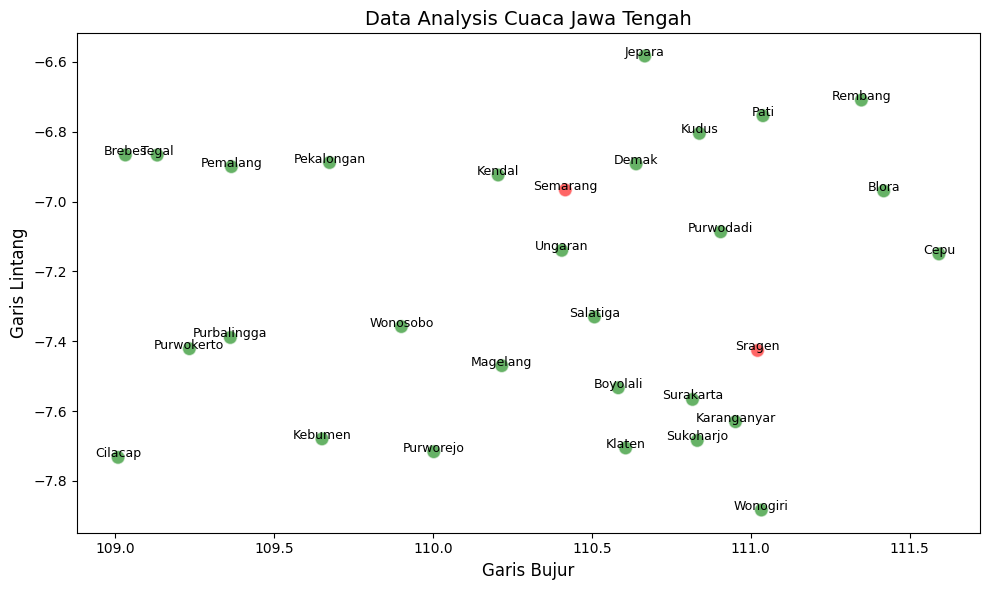

In [ ]:
df = pd.DataFrame(weather_data)

tanggal_sekarang = datetime.now().strftime("%d-%m-%Y")

required_columns = ['temperature', 'longitude', 'latitude', 'city']
if all(col in df.columns for col in required_columns):
    def get_color(temp):
        if temp < 20:
            return 'blue'
        elif temp < 30:
            return 'green'
        else:
            return 'red'

    df['color'] = df['temperature'].apply(get_color)

    plt.figure(figsize=(10, 6))
    plt.scatter(df['longitude'], df['latitude'], s=100, c=df['color'], alpha=0.6, edgecolors='w')

    for i in range(len(df)):
        plt.text(df['longitude'][i], df['latitude'][i], df['city'][i], fontsize=9, ha='center')

    plt.title(f'Data Analysis Cuaca Jawa Tengah', fontsize=14)
    plt.xlabel('Garis Bujur', fontsize=12)
    plt.ylabel('Garis Lintang', fontsize=12)

    plt.tight_layout()
    plt.show()
else:
    print("Kolom yang diperlukan tidak ditemukan dalam DataFrame.")

In [ ]:
df = pd.DataFrame(weather_data)
df.to_csv("cuaca_data_jateng.csv", index=False)
print("Data telah disimpan ke cuaca_data_jateng.csv")

Data telah disimpan ke cuaca_data_jateng.csv


In [ ]:
print(df.columns)

Index(['city', 'temperature', 'humidity', 'description', 'longitude',
       'latitude', 'timestamp'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

print("Analisis Data:")
tanggal_sekarang = datetime.now().strftime("%d-%m-%Y")
jam_sekarang = datetime.now().strftime("%H:%M:%S")
print(f"Tanggal dan Waktu Analisis: {tanggal_sekarang} {jam_sekarang}")

if not df.empty and 'temperature' in df.columns:
    rata_rata_suhu = np.mean(df['temperature'])
    suhu_tertinggi = np.max(df['temperature'])
    kota_tertinggi = df.loc[df['temperature'].idxmax(), 'city']
    suhu_terendah = np.min(df['temperature'])
    kota_terendah = df.loc[df['temperature'].idxmin(), 'city']

    kondisi_umum = df['description'].mode().values[0] if 'description' in df.columns else None

    print(f"Rata-rata suhu: {rata_rata_suhu:.2f}°C")
    print(f"Kota dengan suhu tertinggi: {kota_tertinggi} ({suhu_tertinggi:.2f}°C)")
    print(f"Kota dengan suhu terendah: {kota_terendah} ({suhu_terendah:.2f}°C)")

    if kondisi_umum:
        print(f"Kondisi cuaca paling umum: {kondisi_umum}")
else:
    print("Tidak ada data suhu yang valid untuk dianalisis.")


Analisis Data:
Tanggal dan Waktu Analisis: 21-09-2024 10:56:53
Rata-rata suhu: 27.17°C
Kota dengan suhu tertinggi: Sragen (30.43°C)
Kota dengan suhu terendah: Wonosobo (21.08°C)
Kondisi cuaca paling umum: broken clouds


Grafik suhu telah disimpan ke suhu_jateng.png


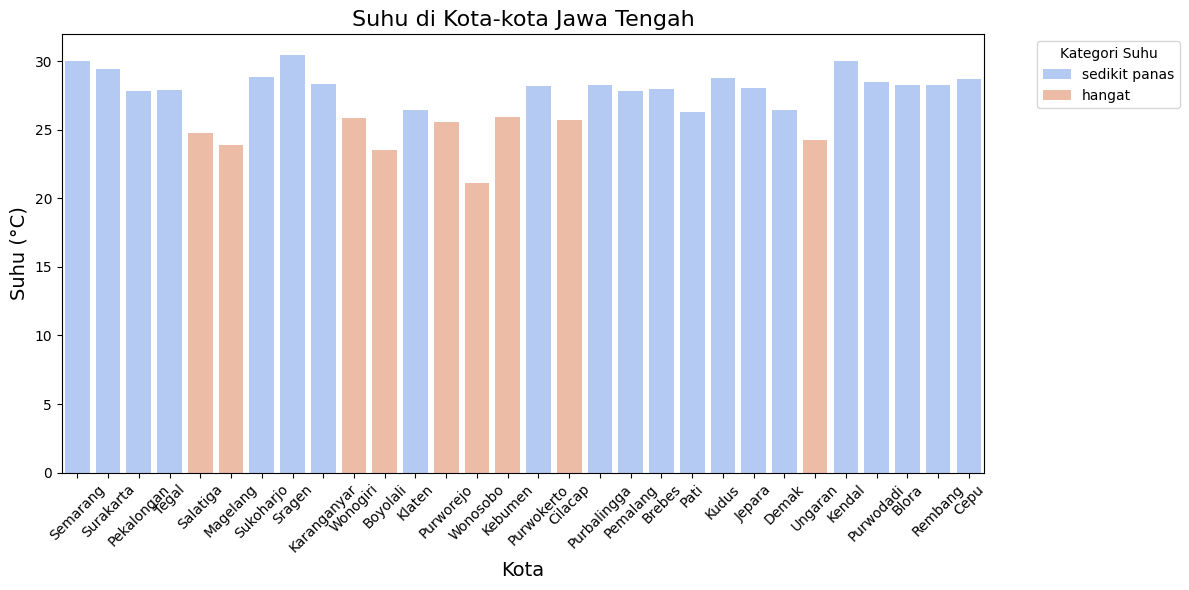

📅 September 2024
⏰ Jam Analisis: 10:57:41


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

if not df.empty and 'temperature' in df.columns and 'city' in df.columns:
    plt.figure(figsize=(12, 6))

    def categorize_temperature(temp):
        if temp > 40:
            return 'sangat panas'
        elif 36 <= temp <= 40:
            return 'panas'
        elif 31 <= temp < 36:
            return 'cukup panas'
        elif 26 <= temp < 31:
            return 'sedikit panas'
        elif 21 <= temp < 26:
            return 'hangat'
        elif 20 <= temp < 21:
            return 'sangat sejuk'
        elif 16 <= temp < 20:
            return 'sejuk'
        elif 12 <= temp < 16:
            return 'cukup sejuk'
        elif 8 <= temp < 12:
            return 'sedikit sejuk'
        elif 5 <= temp < 8:
            return 'cukup dingin'
        elif 0 <= temp < 5:
            return 'dingin'
        elif -5 <= temp < 0:
            return 'cukup dingin'
        elif -10 <= temp < -5:
            return 'sedikit dingin'
        else:
            return 'membeku'

    df['category'] = df['temperature'].apply(categorize_temperature)

    palette = sns.color_palette("coolwarm", n_colors=len(df['category'].unique()))

    sns.barplot(x='city', y='temperature', data=df, hue='category', dodge=False, palette=palette)

    plt.title('Suhu di Kota-kota Jawa Tengah', fontsize=16)
    plt.xlabel('Kota', fontsize=14)
    plt.ylabel('Suhu (°C)', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Kategori Suhu', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    plt.savefig('suhu_jateng.png')
    print("Grafik suhu telah disimpan ke suhu_jateng.png")

    plt.show()

    now = datetime.now()
    bulan = now.strftime("%B")
    tahun = now.year
    jam_sekarang = now.strftime("%H:%M:%S")

    print(f"📅 {bulan} {tahun}")
    print(f"⏰ Jam Analisis: {jam_sekarang}")
else:
    print("Data suhu tidak valid atau kolom yang diperlukan tidak ada.")

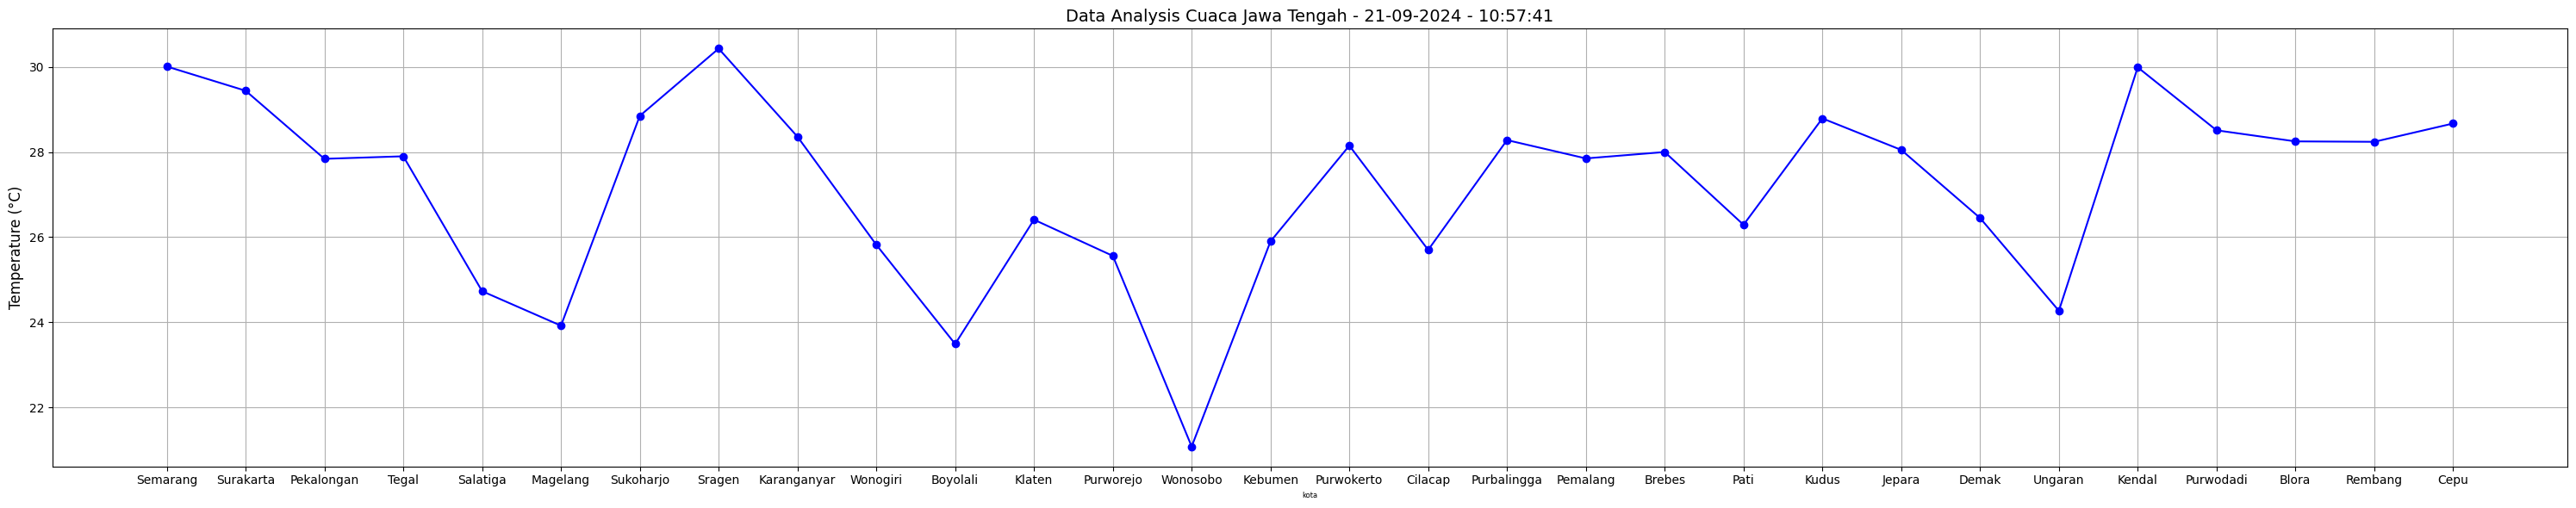

In [ ]:
df = pd.DataFrame(weather_data)

tanggal_sekarang = datetime.now().strftime("%d-%m-%Y")

df_sorted = df.sort_values(by='temperature', ascending=False)

plt.figure(figsize=(30, 6))
plt.plot(df['city'], df['temperature'], marker='o', linestyle='-', color='b')

plt.title(f'Data Analysis Cuaca Jawa Tengah - {tanggal_sekarang} - {jam_sekarang}', fontsize=14)
plt.xlabel('kota', fontsize=6)
plt.ylabel('Temperature (°C)', fontsize=12)

plt.grid(True)

plt.tight_layout()
plt.show()


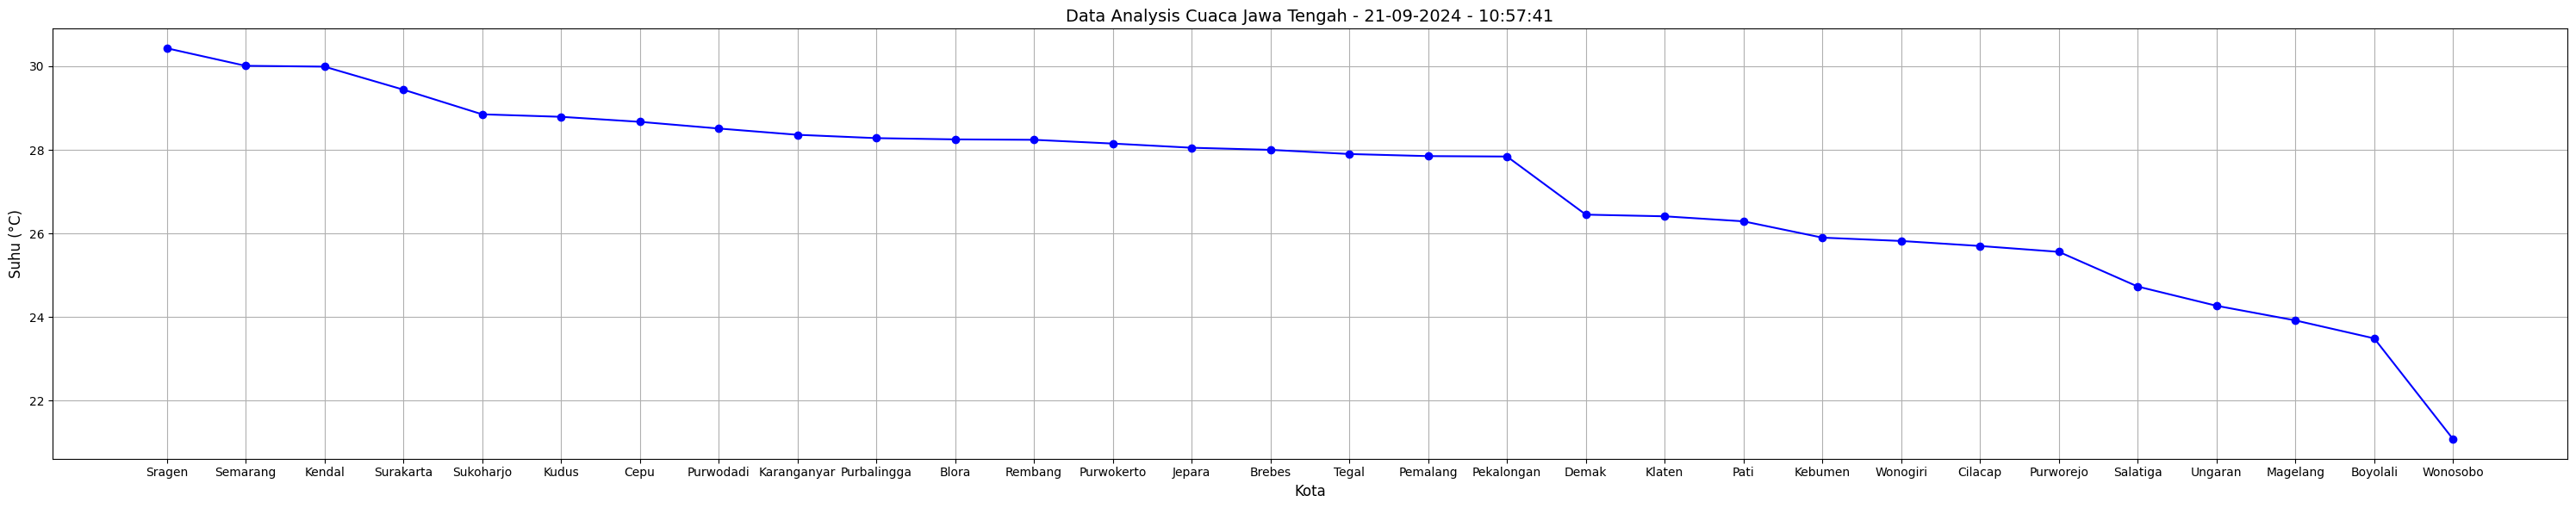

In [ ]:
df = pd.DataFrame(weather_data)

tanggal_sekarang = datetime.now().strftime("%d-%m-%Y")

df_sorted = df.sort_values(by='temperature', ascending=False)

df_sorted = df_sorted.reset_index(drop=True)

plt.figure(figsize=(30, 6))
plt.plot(df_sorted['city'], df_sorted['temperature'], marker='o', linestyle='-', color='b')

plt.title(f'Data Analysis Cuaca Jawa Tengah - {tanggal_sekarang} - {jam_sekarang}', fontsize=14)
plt.xlabel('Kota', fontsize=12)
plt.ylabel('Suhu (°C)', fontsize=12)

plt.grid(True)

plt.tight_layout()
plt.show()

Rata-rata suhu bulan September 2024:
           city  temperature
0         Blora        28.25
1      Boyolali        23.49
2        Brebes        28.00
3          Cepu        28.67
4       Cilacap        25.70
5         Demak        26.45
6        Jepara        28.05
7   Karanganyar        28.36
8       Kebumen        25.90
9        Kendal        29.99
10       Klaten        26.41
11        Kudus        28.79
12     Magelang        23.92
13         Pati        26.29
14   Pekalongan        27.84
15     Pemalang        27.85
16  Purbalingga        28.28
17    Purwodadi        28.51
18   Purwokerto        28.15
19    Purworejo        25.56
20      Rembang        28.24
21     Salatiga        24.73
22     Semarang        30.01
23       Sragen        30.43
24    Sukoharjo        28.85
25    Surakarta        29.44
26        Tegal        27.90
27      Ungaran        24.27
28     Wonogiri        25.82
29     Wonosobo        21.08


<ipython-input-45-a4916a0e9340>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='temperature', data=top_5_hot, palette='coolwarm')


Grafik 5 kota paling panas telah disimpan ke 5_kota_panas.png


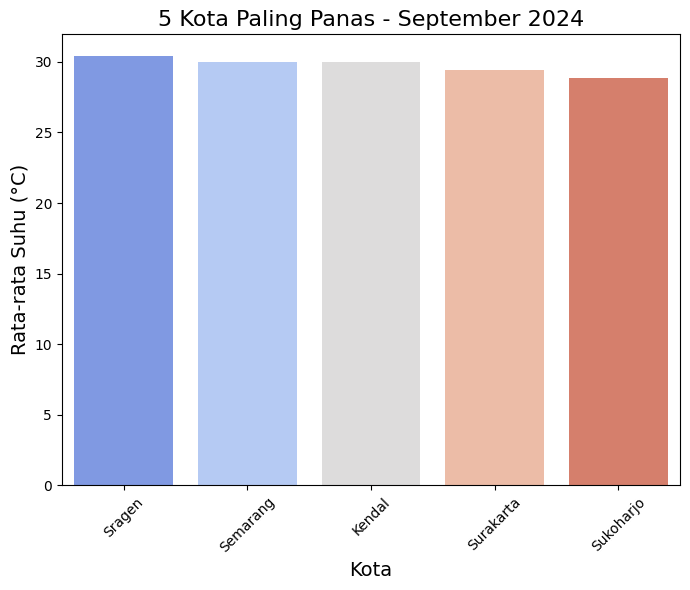

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

bulan = now.strftime("%B")
tahun = datetime.now().year

avg_temp = df.groupby('city')['temperature'].mean().reset_index()

top_5_hot = avg_temp.nlargest(5, 'temperature')

print(f"Rata-rata suhu bulan {bulan} {tahun}:")
print(avg_temp)

plt.figure(figsize=(7, 6))
sns.barplot(x='city', y='temperature', data=top_5_hot, palette='coolwarm')
plt.title(f'5 Kota Paling Panas - {bulan} {tahun}', fontsize=16)
plt.xlabel('Kota', fontsize=14)
plt.ylabel('Rata-rata Suhu (°C)', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('5_kota_panas.png')
print("Grafik 5 kota paling panas telah disimpan ke 5_kota_panas.png")

plt.show()

<ipython-input-46-080835cc4c61>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='temperature', data=top_5_cold, palette='coolwarm')


Grafik 5 kota paling dingin telah disimpan ke 5_kota_dingin.png


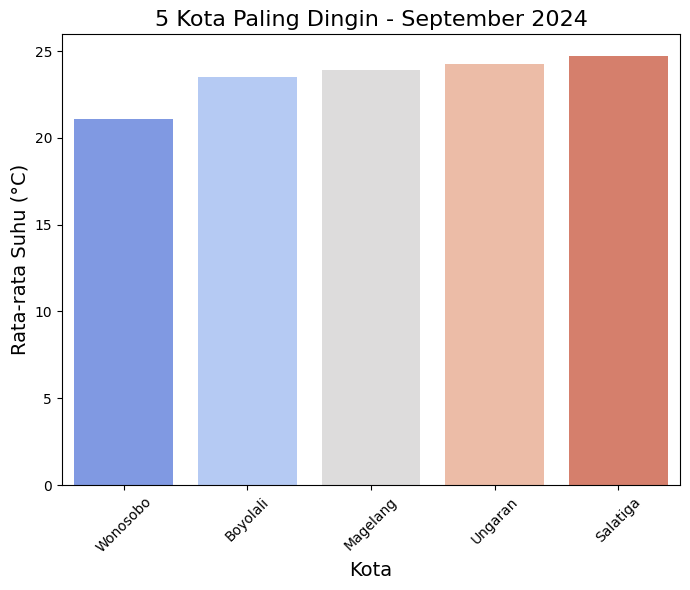

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

bulan = now.strftime("%B")
tahun = datetime.now().year

avg_temp = df.groupby('city')['temperature'].mean().reset_index()

top_5_cold = avg_temp.nsmallest(5, 'temperature')

plt.figure(figsize=(7, 6))
sns.barplot(x='city', y='temperature', data=top_5_cold, palette='coolwarm')
plt.title(f'5 Kota Paling Dingin - {bulan} {tahun}', fontsize=16)
plt.xlabel('Kota', fontsize=14)
plt.ylabel('Rata-rata Suhu (°C)', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('5_kota_dingin.png')
print("Grafik 5 kota paling dingin telah disimpan ke 5_kota_dingin.png")

plt.show()


Grafik kondisi cuaca telah disimpan ke kondisi_cuaca_jateng.png

📅 September 2024
⏰ Jam Analisis: 11:02



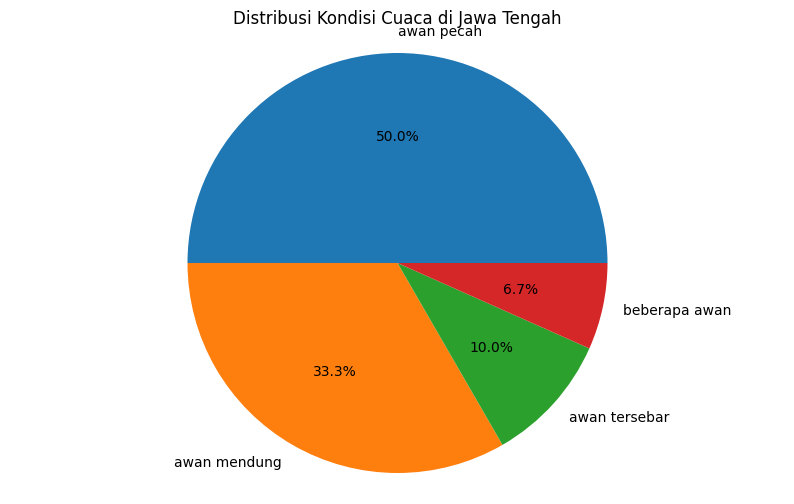

In [ ]:
if not df.empty and 'description' in df.columns:
    translation_dict = {
        'clear sky': 'langit cerah',
        'few clouds': 'beberapa awan',
        'scattered clouds': 'awan tersebar',
        'broken clouds': 'awan pecah',
        'shower rain': 'hujan rintik',
        'rain': 'hujan',
        'thunderstorm': 'petir',
        'snow': 'salju',
        'mist': 'kabut',
        'overcast clouds': 'awan mendung',
    }

    df['description'] = df['description'].replace(translation_dict)

    plt.figure(figsize=(10, 6))
    df['description'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Distribusi Kondisi Cuaca di Jawa Tengah')
    plt.ylabel('')
    plt.axis('equal')
    plt.savefig('kondisi_cuaca_jateng.png')
    print("Grafik kondisi cuaca telah disimpan ke kondisi_cuaca_jateng.png")

    now = datetime.now()
    bulan_tahun = now.strftime("%B %Y")
    jam_sekarang = now.strftime("%H:%M")

    print(f"\n📅 {bulan_tahun}")
    print(f"⏰ Jam Analisis: {jam_sekarang}\n")

Grafik pola cuaca telah disimpan ke pola_cuaca_jateng.png


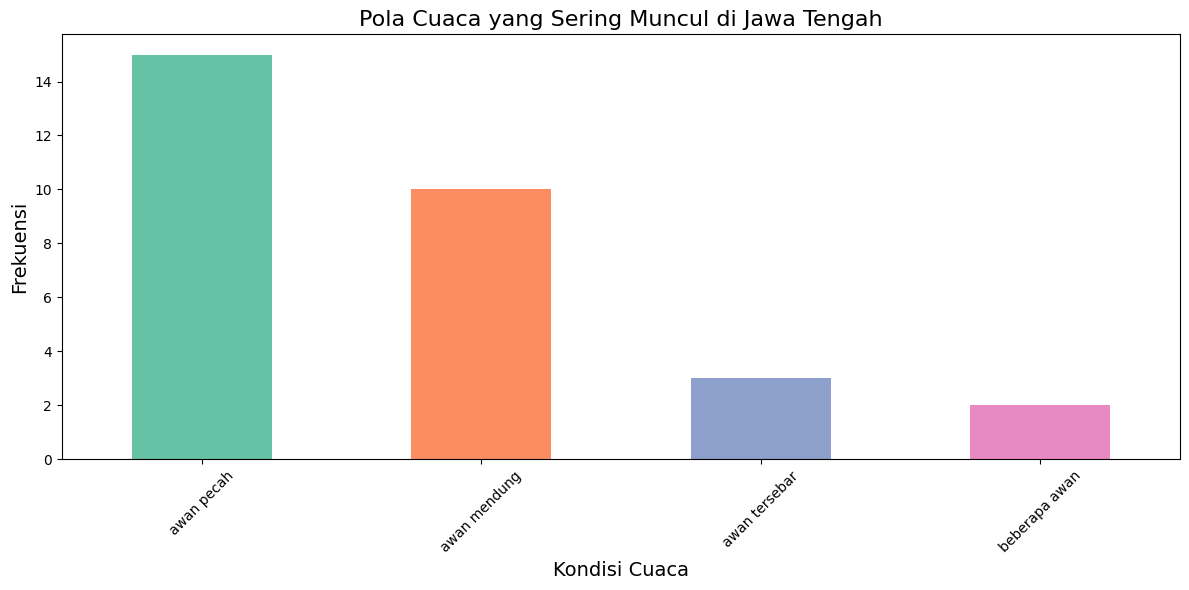

September 2024
Jam Analisis: 11:03


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

if not df.empty and 'description' in df.columns:
    translation_dict = {
        'clear sky': 'langit cerah',
        'few clouds': 'beberapa awan',
        'scattered clouds': 'awan tersebar',
        'broken clouds': 'awan pecah',
        'shower rain': 'hujan rintik',
        'rain': 'hujan',
        'thunderstorm': 'petir',
        'snow': 'salju',
        'mist': 'kabut',
        'overcast clouds': 'awan mendung',
    }

    df['description'] = df['description'].replace(translation_dict)

    weather_counts = df['description'].value_counts()
    colors = sns.color_palette("Set2", n_colors=len(weather_counts))

    plt.figure(figsize=(12, 6))
    weather_counts.plot(kind='bar', color=colors)
    plt.title('Pola Cuaca yang Sering Muncul di Jawa Tengah', fontsize=16)
    plt.xlabel('Kondisi Cuaca', fontsize=14)
    plt.ylabel('Frekuensi', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.savefig('pola_cuaca_jateng.png')
    print("Grafik pola cuaca telah disimpan ke pola_cuaca_jateng.png")

    plt.show()

    now = datetime.now()
    bulan_tahun = now.strftime("%B %Y")
    jam_sekarang = now.strftime("%H:%M")

    print(f"{bulan_tahun}")
    print(f"Jam Analisis: {jam_sekarang}")


<ipython-input-49-1988dddbb503>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='description', y='temperature', data=avg_temp_by_weather, palette='coolwarm', alpha=0.6, label='Rata-rata Suhu (°C)')


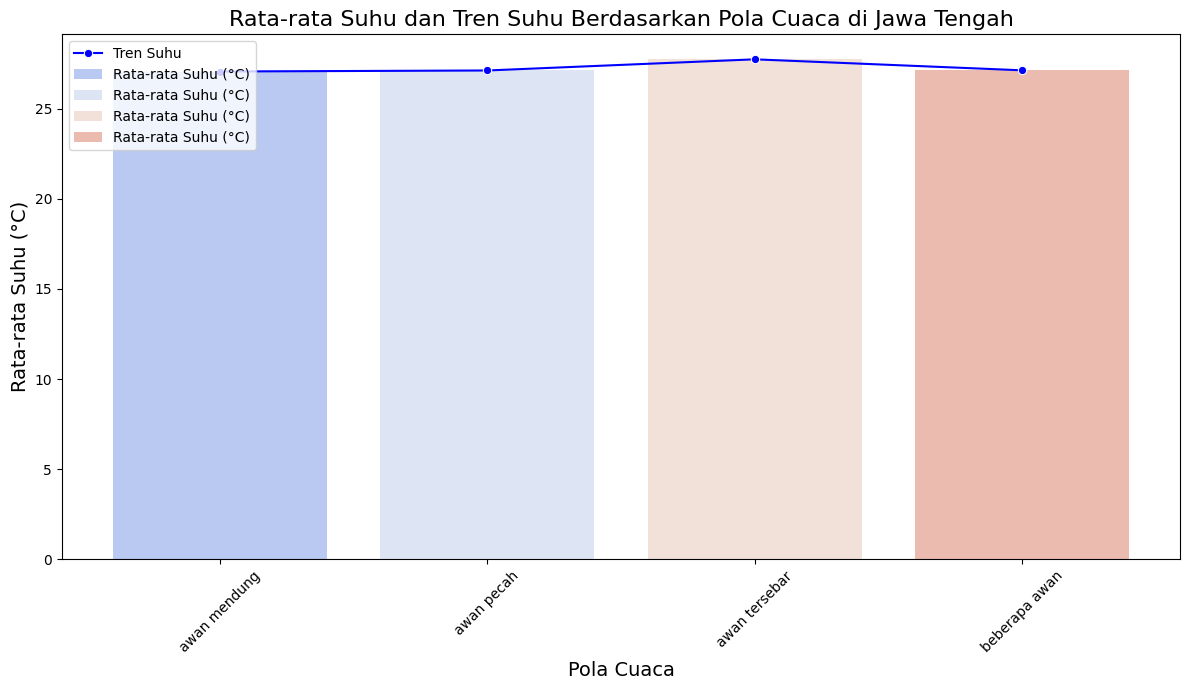

September 2024
Jam Analisis: 11:03


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

if not df.empty and 'temperature' in df.columns and 'description' in df.columns:
    translation_dict = {
        'clear sky': 'langit cerah',
        'few clouds': 'beberapa awan',
        'scattered clouds': 'awan tersebar',
        'broken clouds': 'awan pecah',
        'shower rain': 'hujan rintik',
        'rain': 'hujan',
        'thunderstorm': 'petir',
        'snow': 'salju',
        'mist': 'kabut',
        'overcast clouds': 'awan mendung',
    }
    df['description'] = df['description'].replace(translation_dict)
    avg_temp_by_weather = df.groupby('description')['temperature'].mean().reset_index()
    plt.figure(figsize=(12, 7))
    sns.barplot(x='description', y='temperature', data=avg_temp_by_weather, palette='coolwarm', alpha=0.6, label='Rata-rata Suhu (°C)')
    sns.lineplot(x='description', y='temperature', data=avg_temp_by_weather, color='blue', marker='o', label='Tren Suhu')

    plt.title('Rata-rata Suhu dan Tren Suhu Berdasarkan Pola Cuaca di Jawa Tengah', fontsize=16)
    plt.xlabel('Pola Cuaca', fontsize=14)
    plt.ylabel('Rata-rata Suhu (°C)', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('kombinasi_batang_garis_suhu_pola_cuaca.png')
    plt.show()

    print(f"{bulan_tahun}")
    print(f"Jam Analisis: {jam_sekarang}")

else:
    print("Data cuaca atau suhu tidak valid atau kolom yang diperlukan tidak ada.")
